In [2]:
# Plots the VPRM outcome for different evi data sources and morris parameter pre analysis 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import Functions
from scipy import stats
import datetime
from VPRM_offline.src.Offline_VPRM_for_Morris import flatten_list_2d
# from src.Offline_VPRM_for_Morris import flatten_list_2d

station_names = pd.read_csv('Oslo_analysis/VPRMoutput/All_years_stationnames.csv')
station_names = station_names['snames'].values.tolist()

%run Functions.py

In [3]:
hh = ((31+30+31+ 30+31+31+30+31+30)*48)
hh**(1/3)

23.63331500935002

In [5]:
#get data from param optimization
plot_df = pd.read_csv('Oslo_analysis/VPRMoutput/Results_NEE_pred_default_LM.csv')
plot_df

,NEE_VUT_REF,NEE_default,NEE_LM
0,0.595600,0.057760,1.548120
1,0.451200,0.049812,1.534175
2,1.409100,0.057760,1.548120
3,0.751600,0.057760,1.548120
4,0.524700,0.057760,1.548120
...,...,...,...
303595,1.468360,0.057760,1.548120
303596,1.220890,0.057760,1.548120
303597,1.517020,0.057760,1.548120
303598,0.902387,0.057760,1.548120


In [6]:
# use plot from plot vprm results 0 and 1 

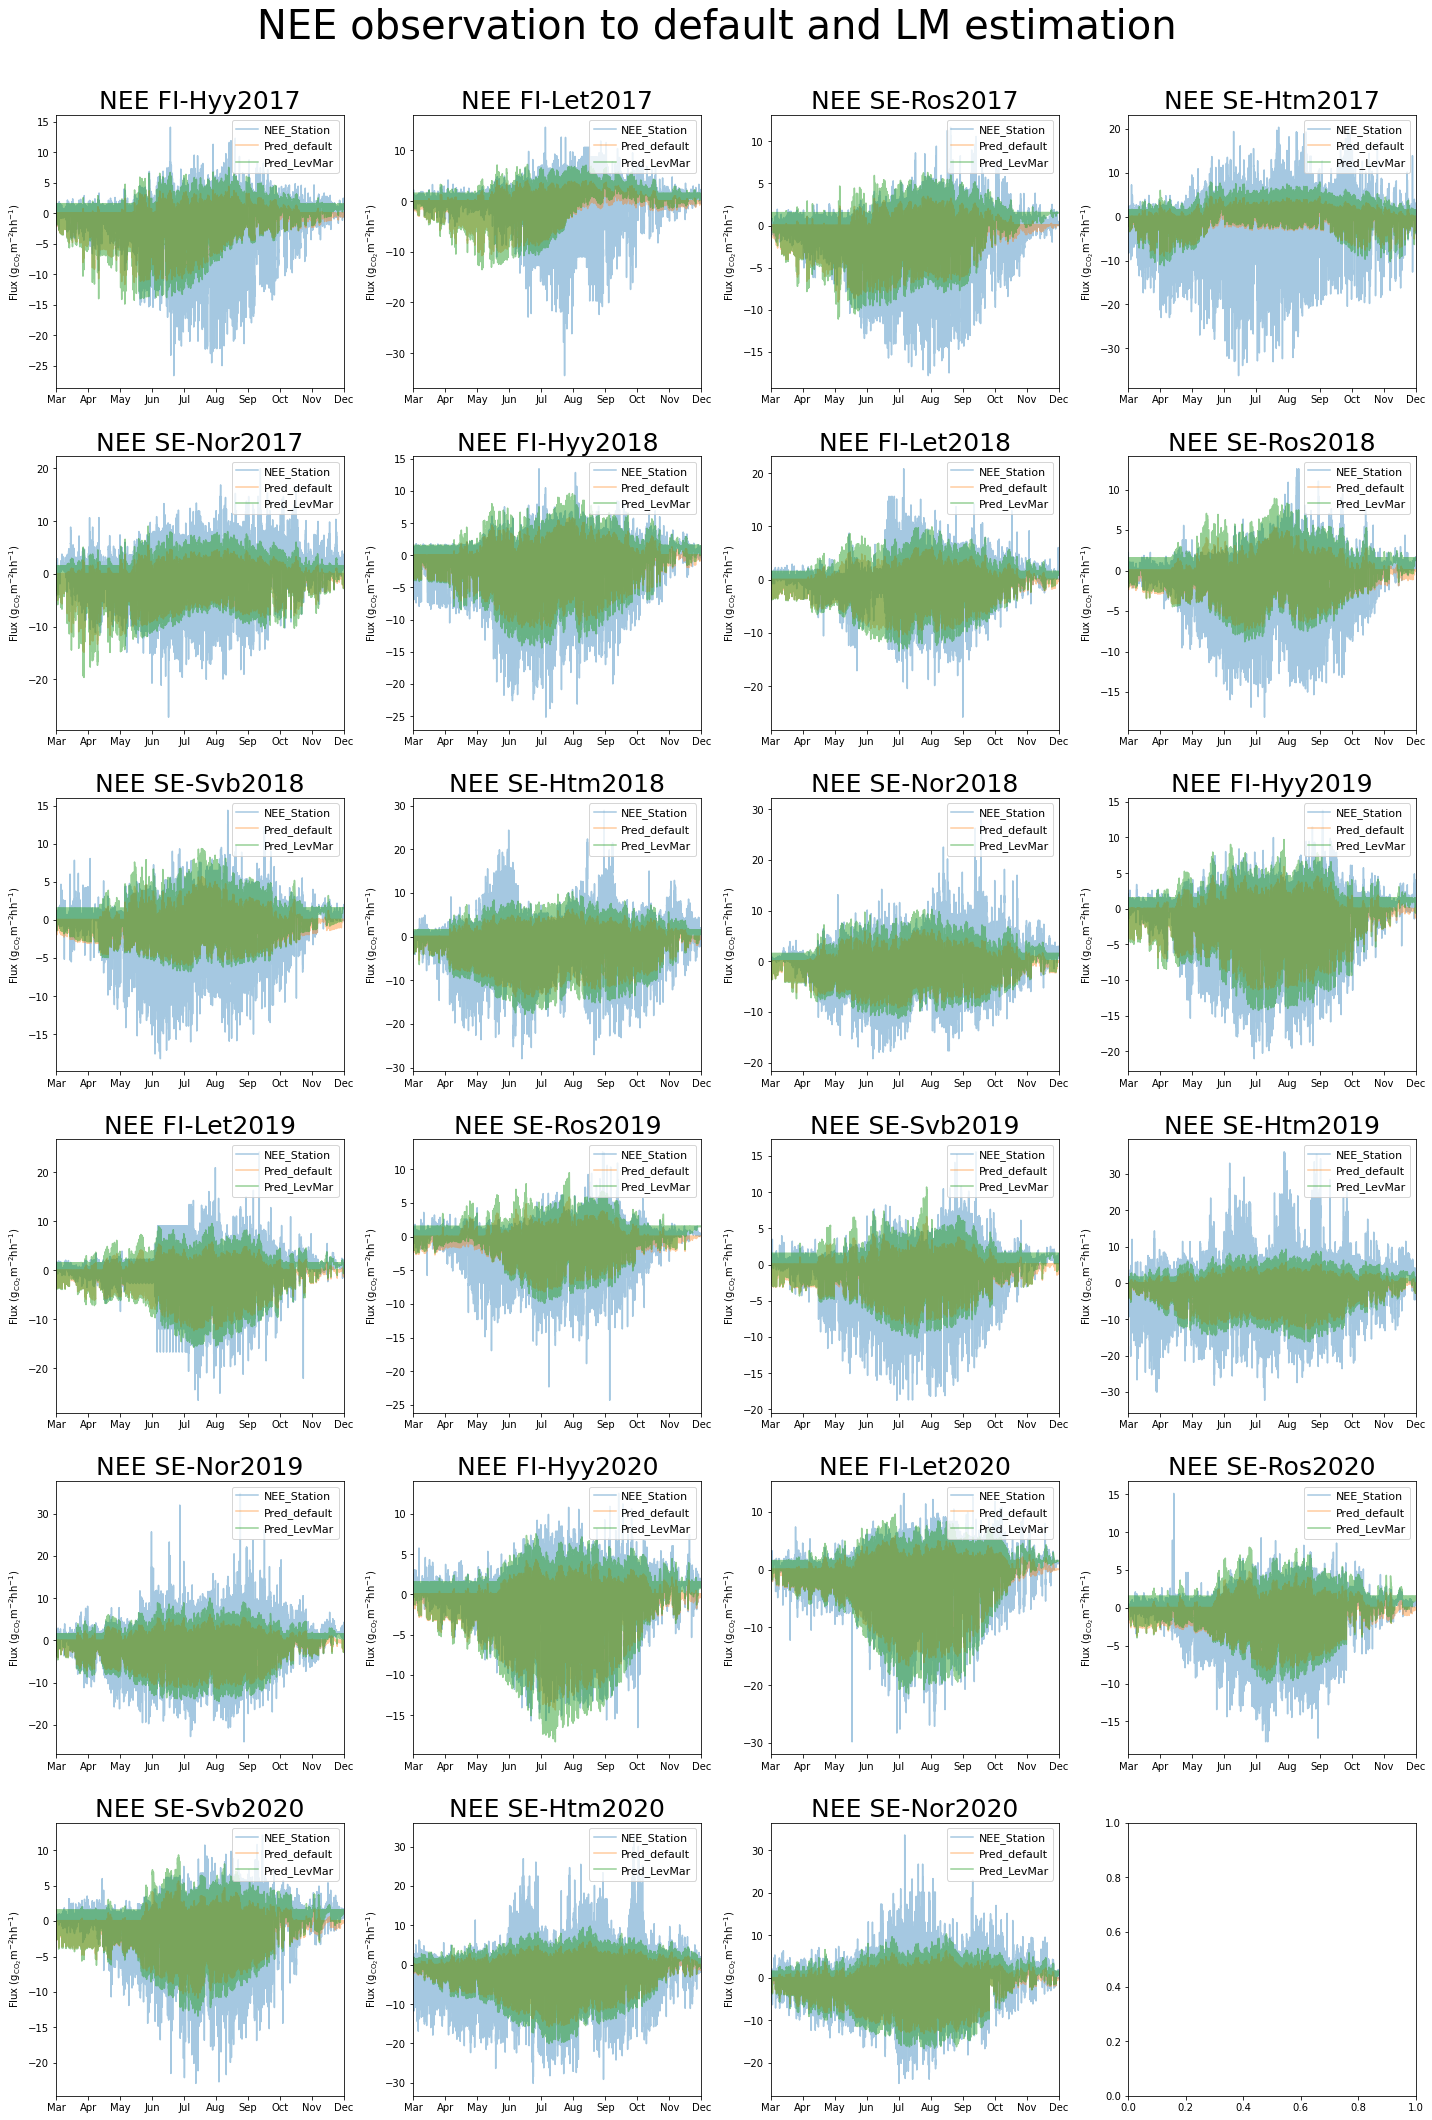

In [7]:
# hh
unit = '($\mathrm{g_{CO_2} m^{-2} hh^{-1}}$)'
hh = ((31+30+31+ 30+31+31+30+31+30)*48)
fig, ax = plt.subplots(6, 4, figsize = (20,30))
for i, sitename in enumerate(station_names):
    x = range(0, hh)
    x1 = i* hh
    x2 = x1+ hh
    ax[int(i/4), i%4].plot(x,plot_df['NEE_VUT_REF'][x1:x2], label = 'NEE_Station', alpha = 0.4)
    ax[int(i/4), i%4].plot(x,plot_df['NEE_default'][x1:x2], label = 'Pred_default', alpha = 0.4)
    ax[int(i/4), i%4].plot(x,plot_df['NEE_LM'][x1:x2], label = 'Pred_LevMar', alpha = 0.5)
    
    ax[int(i/4), i%4].set_xlim(0, hh)
    major_ticks = np.arange(0, hh, 1466.6)
    ax[int(i/4), i%4].xaxis.set_ticks(major_ticks)
    ax[int(i/4), i%4].set_xticklabels(['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'])
    
    ax[int(i/4), i%4].set_title(f'NEE {sitename}', fontsize = 25)
    ax[int(i/4), i%4].legend(loc='upper right', shadow=False, fontsize=11, ncol=1, handletextpad=0.5)
    ax[int(i/4), i%4].set_ylabel('Flux '+unit, fontsize=10)
    

fig.tight_layout()
fig.subplots_adjust(top=0.93, hspace=0.25)
fig.suptitle("NEE observation to default and LM estimation", fontsize=40)
plt.show()

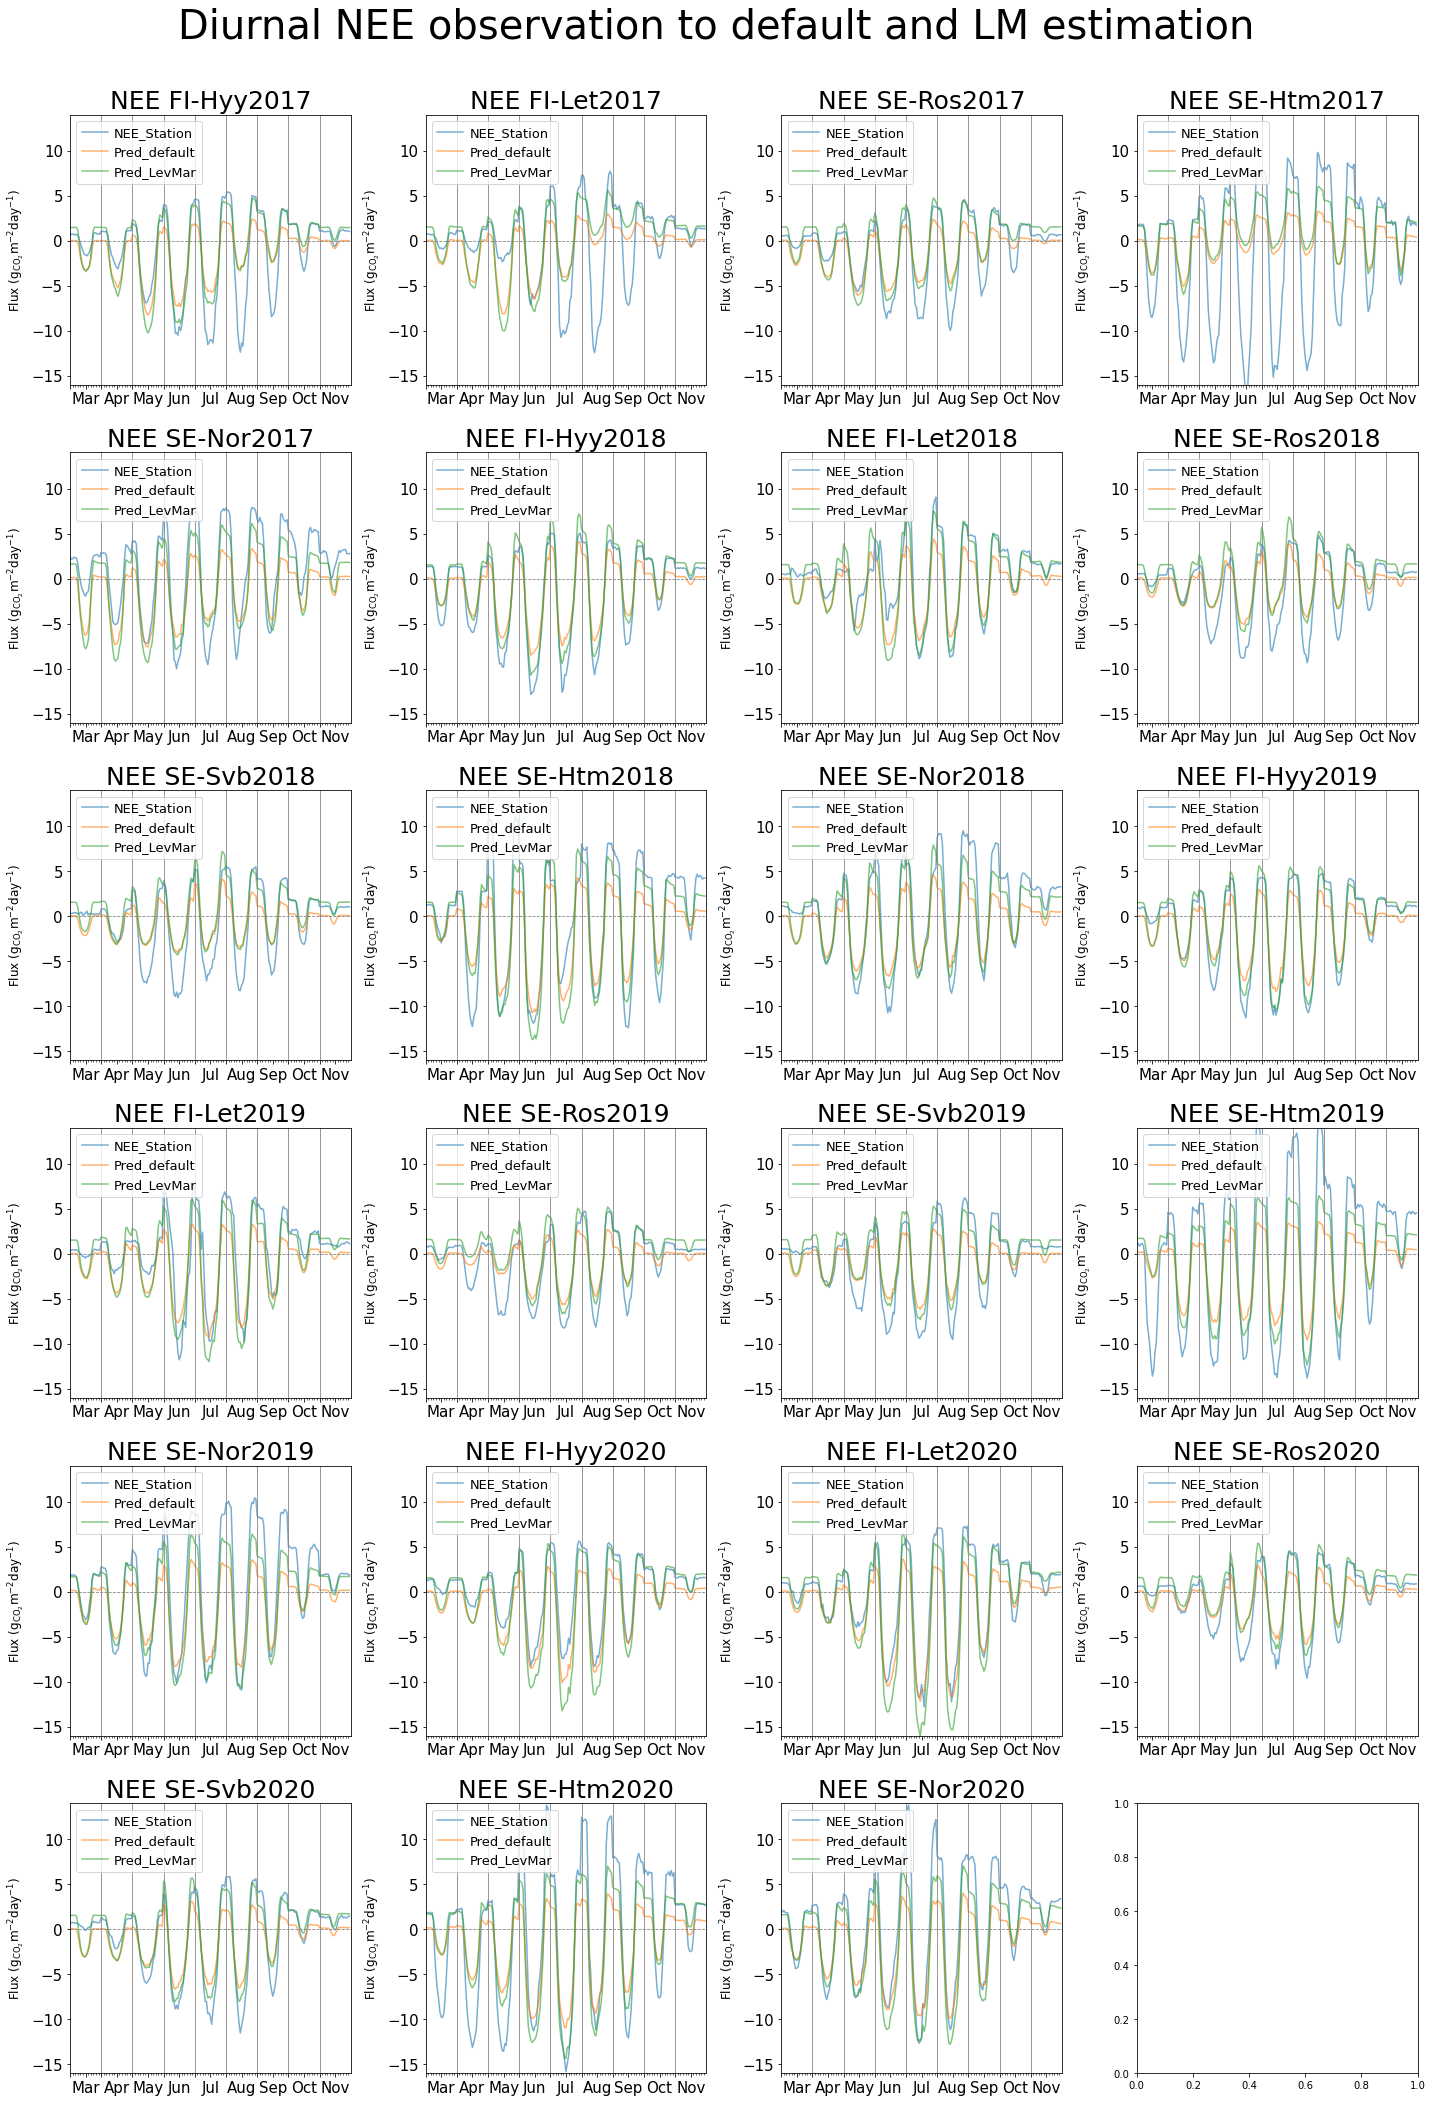

In [11]:
unit = '($\mathrm{g_{CO_2} m^{-2} day^{-1}}$)'

hh = ((31+30+31+ 30+31+31+30+31+30)*48)
fig, ax = plt.subplots(6, 4, figsize = (20,30))

# year = 2017 

for i, sitename in enumerate(station_names):
    name, year = sitename.split("2", 1)
    year = "2" + year 
    x = range(0, hh)
    x1 = i* hh
    x2 = x1+ hh
    
    obs_nee = []
    default_nee = []
    lm_nee = []
    
    begin = pd.date_range(str(year) + "-03-01", periods=9, freq = "MS")
    end = pd.date_range(str(year) +"-03-01", periods=9, freq="M")
    
    m_index = pd.date_range(str(year) + "-03-01", periods=hh, freq="30min") 
    df = plot_df[x1:x2]
    df.index = m_index
    
    # df.index = pd.to_datetime(df['date'])
    
    for month in range(len(begin)):
        df_opt_m = df[begin[month]:end[month]]
        df_opt_mean = df_opt_m.groupby([df_opt_m.index.hour]).mean()
        obs_nee.append(df_opt_mean['NEE_VUT_REF'])
        default_nee.append(df_opt_mean['NEE_default'])
        lm_nee.append(df_opt_mean['NEE_LM'])
    
    obs_nee = flatten_list_2d(obs_nee)
    default_nee = flatten_list_2d(default_nee)
    lm_nee = flatten_list_2d(lm_nee)
    
    time_day = np.arange(0,len(obs_nee))  
    ax[int(i/4), i%4].plot(time_day, obs_nee, label = 'NEE_Station', alpha = 0.6)
    ax[int(i/4), i%4].plot(time_day, default_nee, label = 'Pred_default', alpha = 0.6)
    ax[int(i/4), i%4].plot(time_day, lm_nee, label = 'Pred_LevMar', alpha = 0.6)

    ax[int(i/4), i%4].set_title(f'NEE {sitename}', fontsize = 25)
    legend=ax[int(i/4), i%4].legend(loc='upper left', shadow=False, fontsize=13, ncol=1, handletextpad=0.5)#, bbox_to_anchor=(1., 0.512))
    ax[int(i/4), i%4].set_xlim(0, 216)
    ax[int(i/4), i%4].set_ylim(-16, 14)
    for tt in range(24,216,24):
        ax[int(i/4), i%4].axvline(tt, color='grey', linewidth=0.8)
    ax[int(i/4), i%4].axhline(0, color='grey', linewidth=0.8, linestyle='--')
    # ax[i].set_ylabel('Flux '+unit, fontsize=10)
    major_ticks = np.arange(0, 216, 12)
    minor_ticks = np.arange(0, 216, 2)
    ax[int(i/4), i%4].xaxis.set_ticks(major_ticks)
    ax[int(i/4), i%4].set_xticklabels(['', 'Mar\n','','Apr','','May','','Jun','','Jul','','Aug','','Sep','','Oct','','Nov'])
    ax[int(i/4), i%4].xaxis.set_ticks(minor_ticks, minor = True)
    ax[int(i/4), i%4].xaxis.set_tick_params(which='major', labelsize=15)
    ax[int(i/4), i%4].yaxis.set_tick_params(which='major', labelsize=15)
    ax[int(i/4), i%4].set_ylabel('Flux '+unit, fontsize=12)
    
fig.tight_layout()
fig.subplots_adjust(top=0.93, hspace=0.25)
fig.suptitle("Diurnal NEE observation to default and LM estimation", fontsize=40)
plt.show()
    # ax[int(i/4), i%4].set_title(sitename +' '+ str(year) + ' (RECO) ', fontsize=11)
# fig.savefig(cwd +'figures/'+ str(year)+'_stations_hh.png')   # save the figure to file

# fig1.savefig(cwd +'figures/'+str(year)+'_stations_diurnal.png')   # save the figure to file


In [ ]:
    
    # for j in range(0,9):
    #     if j in [0,2,4,5,7]:
    #         pointer2 = pointer1 + 31
    #     else: 
    #         pointer2 = pointer1 + 30 
            
        # df_opt_m = plot_df[pointer1:pointer2]
        # df_opt_m.index = begin 
        # print(len(df_opt_m))
        # df_opt_mean = df_opt_m.mean()
        # print(df_opt_mean)

        
        # pointer1 = pointer2      
    


In [ ]:
# diurnal 

label = 'Original' 
unit = '($\mathrm{g_{CO_2} m^{-2} day^{-1}}$)'

morris_nee = []
mod_pp_nee = []
mod_nee = []
sen_nee = []
obs_nee = []

begin = pd.date_range("2018-01-31", periods=12)
end = pd.date_range("2018-01-31", periods=12, freq="M")

for month in range(len(begin)):

    df_opt_m = df[begin[month]:end[month]]
    df_opt_mean = df_opt_m.groupby([df_opt_m.index.hour]).mean()
    obs_nee.append(df_opt_mean[label])

    morris_nee.append(df_opt_mean.NEE_morris)

    mod_pp_nee.append(df_opt_mean[station + '_NEE_mod_pp'])
    
    mod_nee.append(df_opt_mean[station + '_NEE_mod'])
    
    sen_nee.append(df_opt_mean[station + '_NEE_sen'])


    
sen_nee = flatten_list_2d(sen_nee)
mod_nee = flatten_list_2d(mod_nee)
morris_nee = flatten_list_2d(morris_nee)
obs_nee = flatten_list_2d(obs_nee)
mod_pp_nee = flatten_list_2d(mod_pp_nee)

# print(len(obs_nee))

time_day = np.arange(0,len(obs_nee))
fig,ax = plt.subplots(figsize=(20,10))
plt.subplots_adjust(left=0.13, right=0.81, top=0.9, bottom=0.12)
colors = ['b','m','c']
ax.plot(time_day, obs_nee, linewidth=1.5, color='k', label='OBS')
ax.plot(time_day, morris_nee, linewidth=1.5, color = 'orange', label='VPRM_morris')
ax.plot(time_day, mod_pp_nee, linewidth=1.5, color = 'g', label='VPRM_mod_pp')
ax.plot(time_day, mod_nee, linewidth=1.5, color = 'r', label='VPRM_mod')
ax.plot(time_day, sen_nee, linewidth=1.5, color = 'violet', label='VPRM_sen')


legend=ax.legend(loc='center left', shadow=False, fontsize=9, ncol=1, handletextpad=0.5, bbox_to_anchor=(1., 0.512))
ax.set_xlim(0, 288)
ax.set_ylim(-80, 40)
for tt in range(24,288,24):
    ax.axvline(tt, color='grey', linewidth=0.8)
ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.ylabel('Flux '+unit, fontsize=10)
major_ticks = np.arange(0, 288, 12)
minor_ticks = np.arange(0, 288, 2)
ax.xaxis.set_ticks(major_ticks)
#ax.set_xticklabels([0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12,0,12])
ax.set_xticklabels(['','Jan\n'+str(year),'','Feb','','Mar','','Apr','','May','','Jun','','Jul','','Aug','','Sep','','Oct','','Nov','','Dec'])
ax.xaxis.set_ticks(minor_ticks, minor = True)
ax.xaxis.set_tick_params(which='major', labelsize=8)
ax.set_title(station, fontsize=11)